### HOUSE PRICES DATA : A COMPREHENSIVE DATA ANALYSIS & PREDICTION MODEL

_RABINDRA NEPAL_

***    

This is my simple take to address the famous House Pricing problem in 
__[kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)__. Starting with looking into deeper in the dataset, we will try to understand the given train dataset in more detail. Since the most important variable in the data is the house 'SalePrice', we will then explore the correlation of SalePrice on the other variables. Mainly, by using python - pandas and seaborn packagaes, we will try to understand the data deeper and will visualize to them in appropriate ways to make the data  visually vivid. 

In [103]:
# Importing all the dependencies required for this Notebook
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

#### Let us import all the data, train and test data, as pandas DataFrames

We start with importing the train data and looking into it broadly before starting to dive into the detail analysis each of the variables.

In [104]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
df_test = pd.DataFrame(test_data)
df_train = pd.DataFrame(train_data)
df_train.head(n=5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [105]:
# The size of the train and test data:

print("Size of the train data: ", train_data.shape)
print("Size of the test data: ", test_data.shape)

Size of the train data:  (1460, 81)
Size of the test data:  (1459, 80)


The test data has one less column than that in train data: which is because it lack the "SalePrice" column and we are going to predict it later by building a machine laearning model - trained with train data set.

_Lets see all the columns/decorations in the train data in more vivid way:_

In [106]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [107]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### NaN / Missing data values

In [108]:
# Let us see the columns that contain NaNs
def missing_values():
    temp_dict = dict()
    for i in df_train.columns:
        if df_train[i].isnull().sum() > 0: 
            temp_dict[i] = df_train[i].isnull().sum()
    return temp_dict
            
# missing features and number of NaN in the features 

#missing_values()

# Few columns/decorations have more than 50% of the data points missing, we will discard those columns.
# uncomment the missing_values() functions called above to look them in detail.

In [109]:
# Deleting the columns which has more than 50% of the missing values

def delete_columns(col):
    if df_train[col].isnull().sum() > df_train[col].count()/2:
        del df_train[col]

for col in df_train.columns:
    delete_columns(col)

# let us now look at the columns that still have missing values/NaNs
missing_values()

{'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'BsmtQual': 37,
 'Electrical': 1,
 'GarageCond': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'LotFrontage': 259,
 'MasVnrArea': 8,
 'MasVnrType': 8}

### Data Engineering / NaN replacements
Let us engineer the remaining NaN values in the above columns of the data.
We will check each of the columns that misses the values - NaNs. Then we will
replace those NaNs in each of the columns one by one.

### LotFrontage Imputation

We impute the data with missing LotFrontage by using linear regression model. It seems that LotFrontage has somewhat linear relation with LotArea, therefore, we impute the missing LotFrontage data by the linear regression with LotArea as follow:

In [110]:
# This function predicts the LotFrontage of the missing data values using a Linear Regression model 
# Build a linear regression model with known LotArea and LotFrontage and predicts the LotFrontage for 
# the data with missing values

def fillna_lotfrontage(X_train, y_train):

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    
    return reg.coef_.tolist()[0], reg.intercept_ 

In [111]:
X_train_list = df_train['LotArea'].dropna()[:1000]
X_train = [[X_train_list[i]] for i in range(len(X_train_list))]
y_train = df_train['LotFrontage'].dropna()[:1000]

w, intercept = fillna_lotfrontage(X_train, y_train)

for i in range(len(df_train["LotFrontage"])):
    if pd.isnull(df_train.loc[i, "LotFrontage"]):
        df_train.loc[i, "LotFrontage"] = df_train.loc[i, "LotArea"]*w + intercept

In [112]:
# No NaN values in the LotFrontage column left
df_train["LotFrontage"].isnull().sum()

0

### "MasVnrType" and "MasVnrArea" Imputation

***
Here, we will see all the possible 'MasVnrType' and find out the most frequent type. Since only 8 of the data points have missing values, we will simply replace them with the most frequent type of 'MasVnrType', which is None type as obtained below, and the corresponding 'MasVnrArea' will be set to be 0.

In [113]:
# Let us see the distribution of "MasVnrType" in the data
df_train["MasVnrType"].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

Since most of the houses have "MasVnrType" values "None", let us replace remaining 8 values with "None" type and corresponding "MasVnrArea" value of 0

In [114]:
for i in range(len(df_train["MasVnrType"])):  
    if pd.isnull(df_train.loc[i, "MasVnrType"]) and pd.isnull(df_train.loc[i, "MasVnrArea"]):
        df_train.loc[i, "MasVnrType"] = "None"
        df_train.loc[i, "MasVnrArea"] = 0
        
# NaNs values in both MasVnrType and MasVnrArea are now removed
df_train["MasVnrType"].isnull().sum(), df_train["MasVnrArea"].isnull().sum()

(0, 0)

### "BsmtQual" Imputation

In this case, we have more missing values, 37, therefore, we will not simply replace all of them with simply the most frequent value in the data set. There are four variables/columns under this category/group. We will see all of them in detail with their effect on the 'SalePrice', then variable with high importance will be imputated in the missing data points based on the distribution for the available values with respect to 'SalePrice'. 

In [115]:
# Let us see the type distribution.
df_train["BsmtQual"].describe()
# it seems "TA" repeats most for alomost fifty percent of the data
#  there are four possible options

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

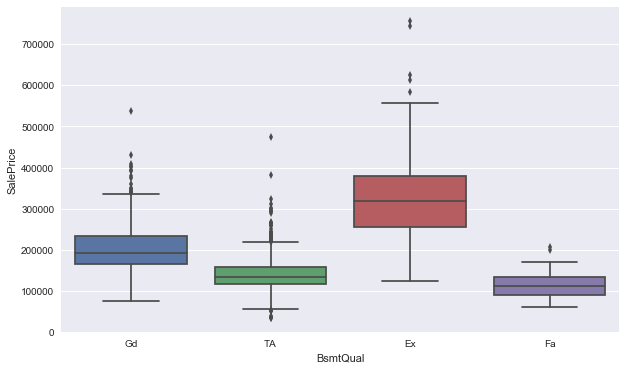

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="BsmtQual", y="SalePrice", data=df_train)

It seems that the "BsmtQual" type has strong correlation with the SalePrice, therefore, let us impute the missing "BsmtQual" type according to the corresponding "SalePrice" for the train_data. For test_data that don't have SalePrice, we will replace with the most frequent value later.

In [117]:
# List of the 'BsmtQual' types (four types from the above boxplot)

pd.DataFrame(df_train["BsmtQual"].unique()).dropna()[0].tolist()

['Gd', 'TA', 'Ex', 'Fa']

In [118]:
# Replacing the NaNs based on the above boxplot: SalePrice and BsmtQual distribution

for i in range(len(df_train["BsmtQual"])):  
    if pd.isnull(df_train.loc[i, "BsmtQual"]):
        
        sale_price = df_train.loc[i, "SalePrice"]
        
        if 0 < sale_price < 125000:
            df_train.loc[i, "BsmtQual"] = 'Fa'
        
        elif 125000 < sale_price < 170000:
            df_train.loc[i, "BsmtQual"] = 'TA'
        
        elif 170000 < sale_price < 255000:
            df_train.loc[i, "BsmtQual"] = 'Gd'
            
        elif sale_price > 255000:
            df_train.loc[i, "BsmtQual"] = 'Ex'
        
# NaNs values in both BsmtQual and MasVnrArea are now removed
df_train["BsmtQual"].isnull().sum()

0

In [119]:
# The other columns related with BsmtQual don't have much clear impact on the SalePrice
# Taking the most important variable on the category into consideration, we drop the other
# related columns: 'BsmtExposure',  'BsmtFinType1', 'BsmtFinType2', 'BsmtCond'.

delete_columns = ['BsmtExposure',  'BsmtFinType1', 'BsmtFinType2', 'BsmtCond']
for col in delete_columns:
    del df_train[col]

### Garage* Columns

There are 7 variables/columns under this category. We will first find out the most important variable based on their effect on SalePrice. We will futher consider the variables only if they are important.

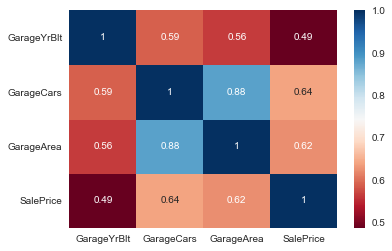

In [120]:
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish','GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', \
                  'SalePrice']
# Let us plot heatplot diagrams to see the correlation of the above variables on the SalePrice
sns.heatmap(df_train[garage_columns].corr(), annot=True, cmap="RdBu")

Since GarageCars and GarageArea both have strong correlation with SalePrice, but they are correlated each other very strongly, therefore we take only GarageCars as an important varible that has good relation with SalePrice. GarageCars - number of cars that can be parked inside, is proportional to the area of the garage so to be more clean we choose GarageCars. Since GarageYrBlt is mostly same as YearBlt, we take only YearBlt into consideration which has stronger correlation with SalePrice.

In [121]:
# Since GarageCars doesn't have any missing values(NaN), we don't have to replace any NaN values here.
# We simply delete the columns that are not important and will not consider ahead for further study.

garage_columns.remove('GarageCars')
garage_columns.remove('SalePrice')
for col in garage_columns:
    # deleting the columns except those two in the garage_columns list we consider 
    del df_train[col]

### Electrical

There is one more variable left with only one value missing. Let us see this variable in more detail before imputing the missing value.

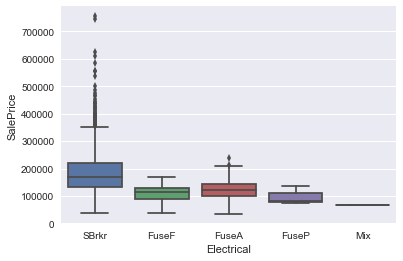

In [122]:
# We have one value NaN in the column 'Electrical'
# Let us see its importance: relation with SalePrice

sns.boxplot(x='Electrical', y='SalePrice', data=df_train)

In [123]:
df_train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [124]:
for i in range(len(df_train['Electrical'])):
    if pd.isnull(df_train.loc[i, 'Electrical']):
        # print(df_train.loc[i, 'SalePrice'])
        # Checked the value of SalePrice corresponding to the missing Electrical value
        # and the missing value is imputed looking at the above graph
        df_train.loc[i, 'Electrical'] = 'SBrkr'
# No NaN left in 'Electrical' column now
df_train['Electrical'].isnull().sum()

0

### Finally,
We completed the missing values imputation. We filled some of the NaN values and droppped some columns that don't have strong relation with the SalePrice.

In [125]:
df_train.columns, df_train.columns.shape[0]

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
        'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
        'Functional', 'Fireplaces', 'GarageCars', 'PavedDrive', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
        'SalePri

## Categorical or Numerical?

Out of the 66 remaining columns/decorations left above, let us separate categorical and numerical variables.

In [126]:
# separating categorical and numerical variables

variables_list = df_train.columns.tolist()
numerical_vars = []
for col in variables_list:
    try:
        if float(df_train[col][1]).is_integer():
            numerical_vars.append(col)
    except ValueError: pass

catergorical_vars = set(variables_list) - set(numerical_vars)
#catergorical_vars

# Let us see number of each type of columns/decorations
len(catergorical_vars), len(numerical_vars)

(30, 36)

## Shortlisting important columns (Numerical Variables Only)

Now let us find out the columns that are important to consider for the machine learning model that predicts the 'SalePrice'. Here, first we concentrate on the columns that contain numerical data only. We will come back to categorical data later.

### Interesting columns:
Just by looking at the property as well as with some knowledge about the data gained through above study, let us make list of the columns which have strong effect on the SalePrice and are probably important for the prediction model to build.

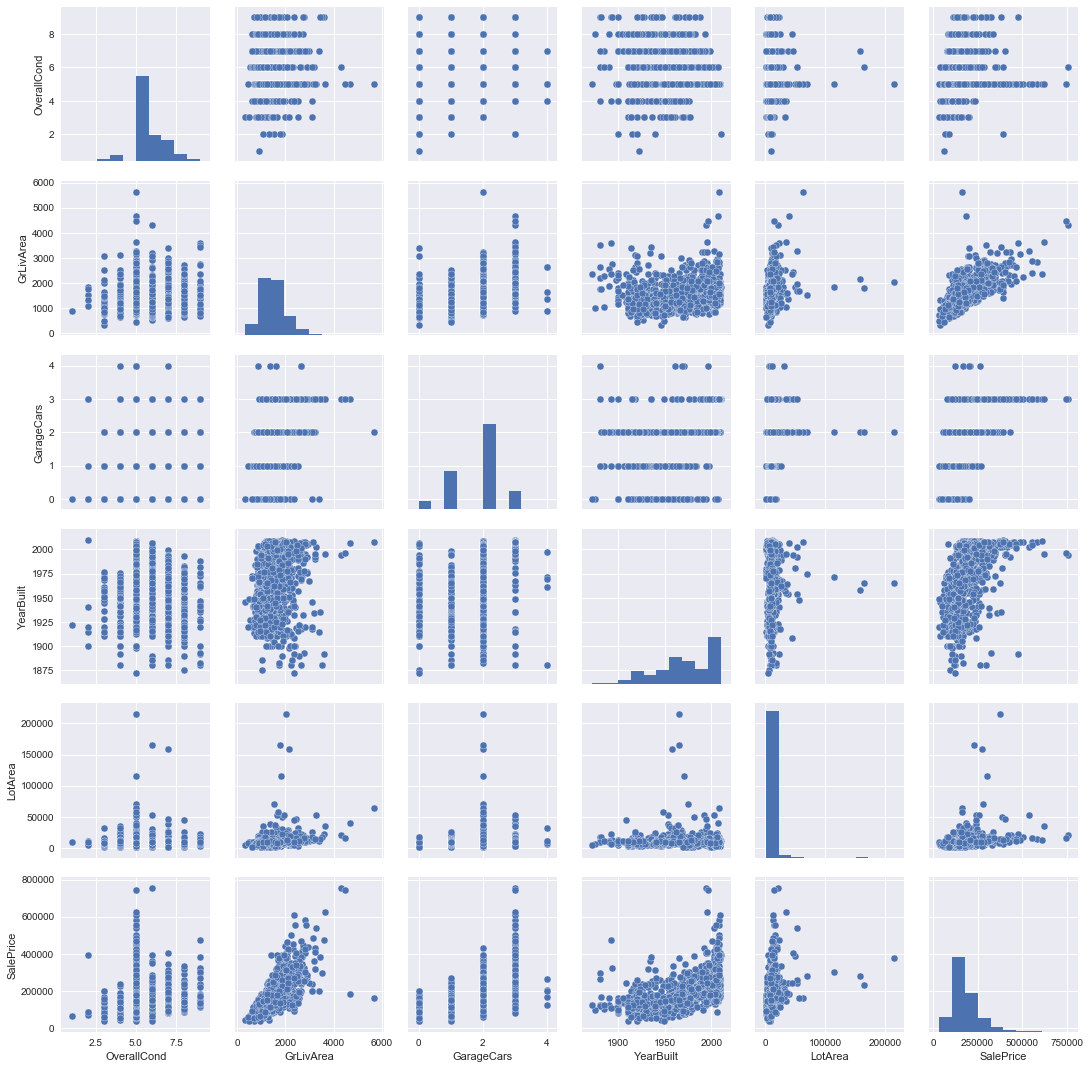

In [127]:
interesting_cols = ["OverallCond", "GrLivArea", "GarageCars", "YearBuilt", "LotArea", "SalePrice"]

plt.figure(figsize=(14,10))
sns.pairplot(df_train[interesting_cols], dropna=True)
plt.show()
del interesting_cols


### Correlation between the variables:

Let us draw heatmap to study the correlations between different variables of SalePrice of the houses. We will then list the most important varibles looking at the heatmap. The variables with highest correlation with SalesPrice will be important for the further analysis and will be considered ahead.

In [128]:
correlation_matrix = df_train.drop(["Id"], axis=1).corr()
#plt.figure(figsize=(12,8))
#sns.heatmap(corr_mat, square=False)
#del corr_mat

### Now let us look at columns with high correlation with 'SalePrice'

The correlation_matrix defined above forms very large correlation matrix of all numerical variables. Let us look at the variables that are important for us. Therefore, we look only at the variables that have correlation greater than 0.1 with SalePrice in the above correlation matrix formed. Below is the heatmap of those important variables:

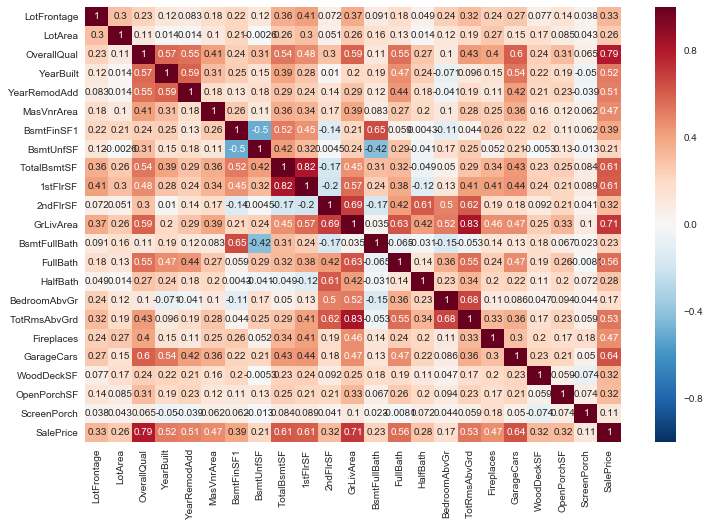

In [129]:
# Let us find out the variable names that have high correlation with SalePrice
# We call these variables important variables.

variables = correlation_matrix.columns
important_variables = []
for row in variables:
    corrl = correlation_matrix.loc[row, 'SalePrice']
    if corrl > 0.1:
        important_variables.append(row)

hp = correlation_matrix.loc[important_variables, important_variables]
plt.figure("Heatmap-Important Variables", figsize=(12,8))
sns.heatmap(hp, annot=True, cbar=True)

Look at the above heatmap, there are some variables which are correlated very strongly. We can possibly drop some of the variables if they don't give any extra information or simply gives the redundant information from the other variable. 

If we look at 'TotRmsAbvGrd' and 'GrLivArea', they are strongly correlated and it cleary make sense, as total living area gives idea about the total number of rooms so that we can drop 'TotRmsAbvGrd'. Similarly, by looking at the relation of variables in 'SalePrice' and their inter-relations with each other we further drop 'BsmtFinSF1', 'BsmtUnfSF', 'ScreenPorch' and 'HalfBath' (hope 'FullBath' sufficiently captures the effect on 'SalePrice').

In [130]:
# deleting these columns from the dataframe
for col in ['TotRmsAbvGrd', 'BsmtFinSF1', 'BsmtUnfSF', 'ScreenPorch', 'HalfBath']:
    del df_train[col]

In [131]:
num_variables = set(numerical_vars) - set(['Id', 'TotRmsAbvGrd', 'BsmtFinSF1', 'BsmtUnfSF', 'ScreenPorch', 'HalfBath'])

### 'OverallQual': an important variable to look at

Since 'OverallQual' is a variable with clear effect on the 'SalePrice', let us look at the relation between 'OverallQual' and 'SalePrice'.

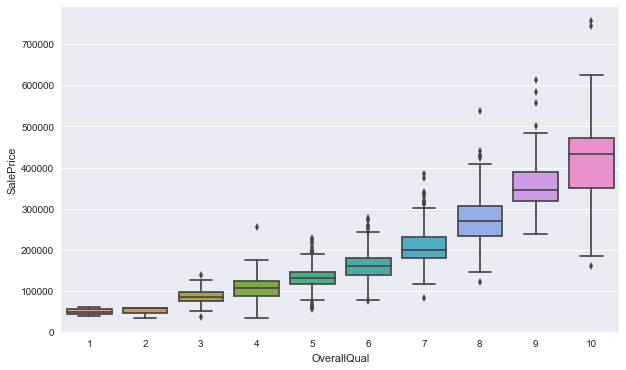

In [132]:
# Boxplot

plt.figure(figsize=(10,6))
sns.boxplot(x="OverallQual", y="SalePrice", data=df_train)

Looking at the above Boxplot, it can be seen that the average SalePrice is almost directly proportional to the OverallQual of the house. Therefore, OverallQual is very important variable to take into account for further calcualtions.

c:\miniconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


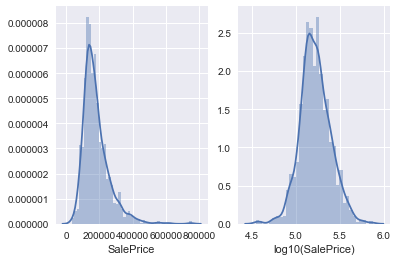

In [133]:
# Data Normalaization
# Normalizing the right skewed SalePrice

fig, ax =plt.subplots(1,2)
sns.distplot(df_train['SalePrice'], ax=ax[0])
sns.distplot(np.log10(df_train['SalePrice']), ax=ax[1])
plt.xlabel('log10(SalePrice)')
fig.show()

Let us replace the skewed 'SalePrice' column with the normalized log10(SalePrice) data, which will be used for the regression prediction model.

In [134]:
df_train.loc[:, 'SalePrice'] = np.round(np.log10(df_train['SalePrice']), 3)

In [135]:
df_train['SalePrice'].head()

0    5.319
1    5.259
2    5.349
3    5.146
4    5.398
Name: SalePrice, dtype: float64

### Outliers Removal 

Let us look at some of the outliers data points in the most important variables to be used in the prediction model. We will drop such data points entirely from the train data depending upon their presence in the important columns/decorators.  Here, we will are looking outliers in 'LotArea' and 'GrLivArea' variables. 

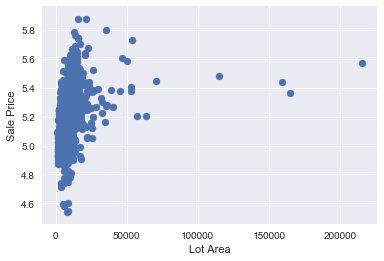

In [136]:
# Plottng the LotArea - SalePrice graph

plt.scatter(df_train["LotArea"], df_train["SalePrice"])
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.show()

The four data points on the far right side of the graph are outliers in the data set, based on LotArea/SalePrice distribution, and we remove these four data points from the dataset (these data points corresponding to all columns/decorators will be removed).

In [137]:
df_train['LotArea'].shape[0]

1460

In [141]:
# the four point's indices (we drop four rows with index names in following list)
drop_index_list = df_train[df_train['LotArea'] > 100000].index.tolist()
df_train.drop(drop_index_list, inplace=True)
print("avoiding the above dataframe printing")

avoiding the above dataframe printing


In [142]:
# check back the number of data points reduced by 4 now
df_train['LotArea'].shape[0]

1456

### Correlation with 'SalePrice'

Let us check the correlation of remaining numerical variables with 'SalePrice' once again now.

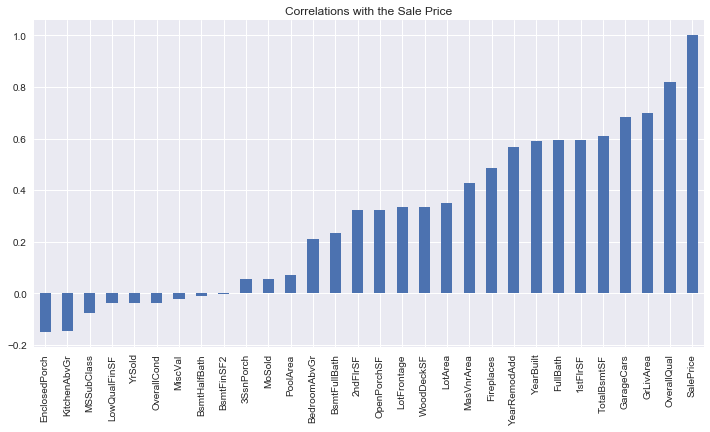

In [143]:
corr_with_SalePrice = df_train.drop(["Id"], axis=1).corr()
plot_data = corr_with_SalePrice["SalePrice"].sort_values(ascending=True)
plt.figure(figsize=(12,6))
plot_data.plot.bar()
plt.title("Correlations with the Sale Price")
plt.show()
del plot_data

We can see the correlation of remaining numerical columns/decorations on 'SalePrice'. The columns that have clear correlation (high positive or high negative) are important for the prediction model, but few of those with small (about zero) correlation will not have much effect on the 'SalePrice', therefore, we can still drop few of them.

## Categorical columns/decorations

We looked into all the numerical columns/decorations above and got some rough idea about their distribution and importance on the 'SalePrice' determination. The final/important columns of them will be considered for the prediction model development later. There are also many columns that don't have numerical values, rather they have descriptive categorical values. Now, we will concentrate on those categorical columns below.

In [144]:
categorical_list = list()
for i in catergorical_vars:
    categorical_list.append(i)
# Let us see all the possible categories in all of the categorical variables
for col in categorical_list:
    print(col, ": ", df_train[col].unique())

LandSlope :  ['Gtl' 'Mod' 'Sev']
HeatingQC :  ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Street :  ['Pave' 'Grvl']
Exterior1st :  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Functional :  ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
Foundation :  ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Heating :  ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Electrical :  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
Exterior2nd :  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Br

Let us now look at the 'SalePrice' variation on different categories of categorical variables/columns. This will give us some idea about the columns that are important for us, and which will be considered further.

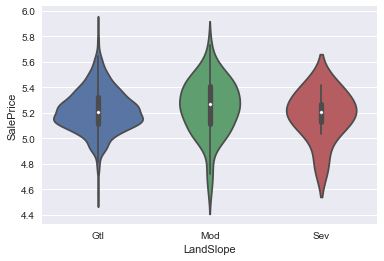

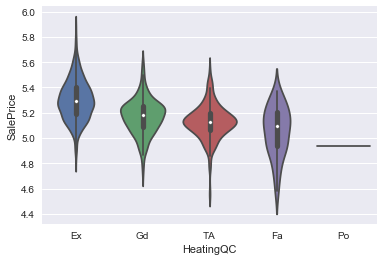

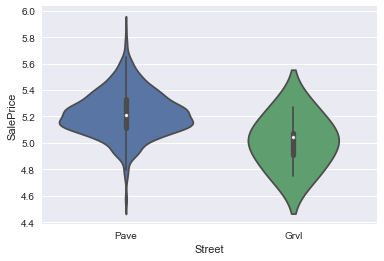

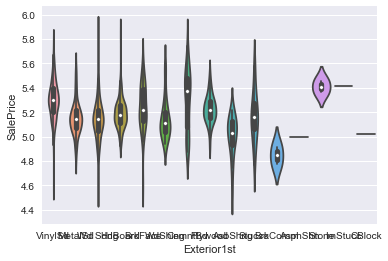

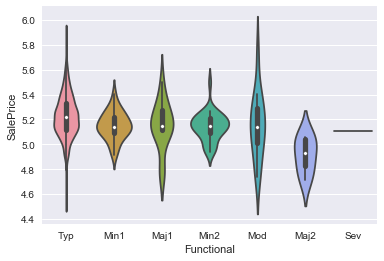

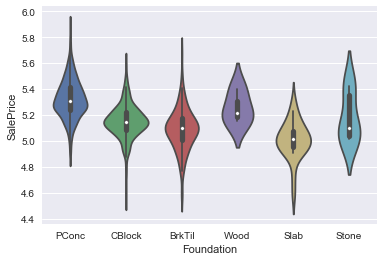

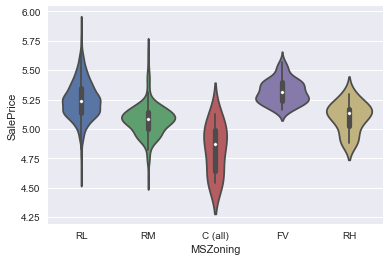

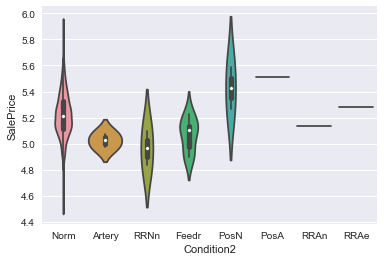

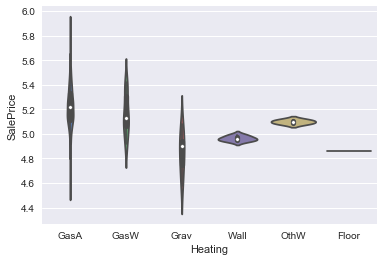

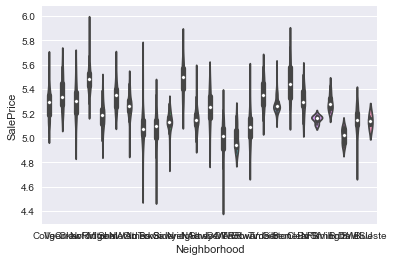

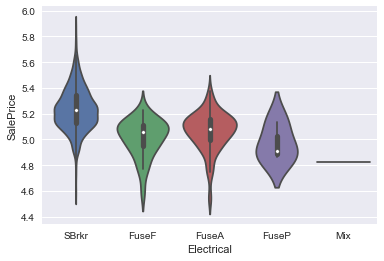

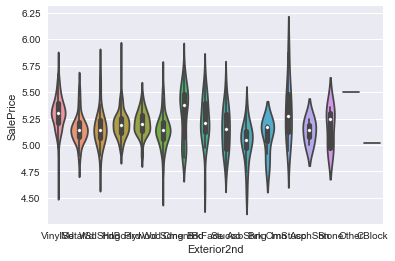

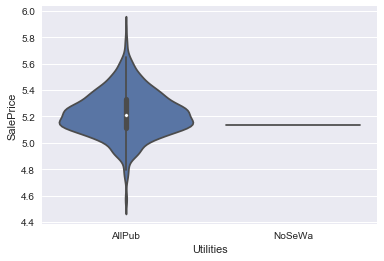

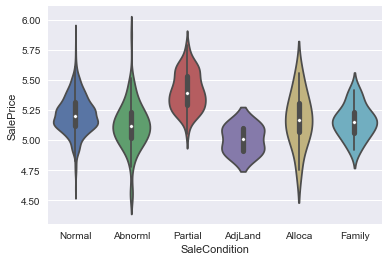

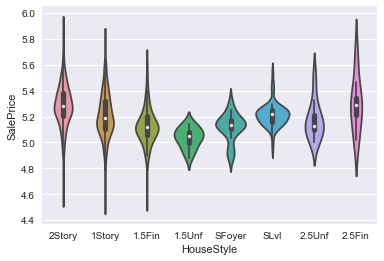

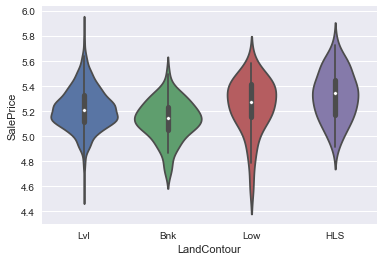

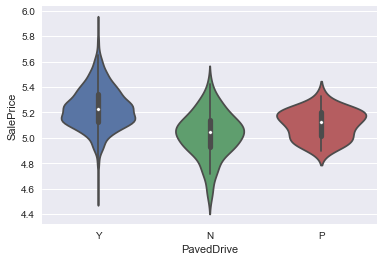

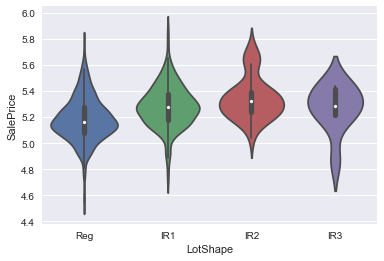

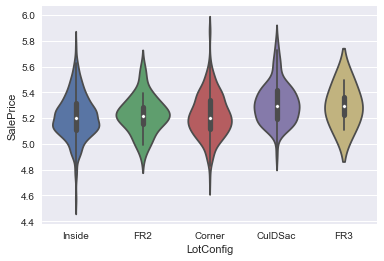

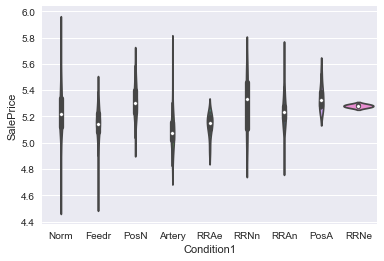

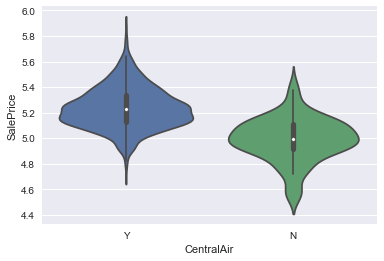

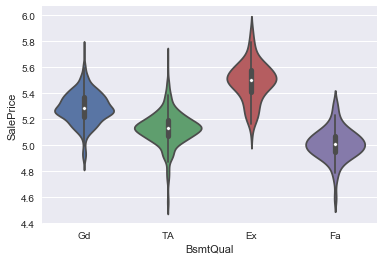

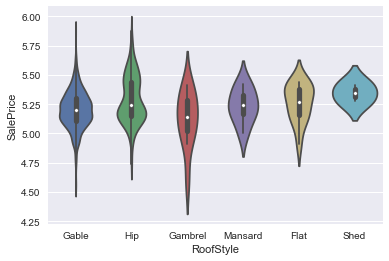

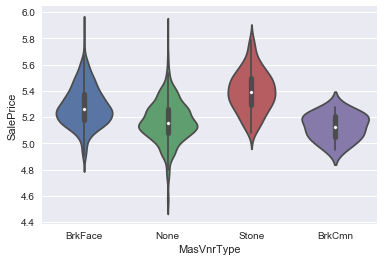

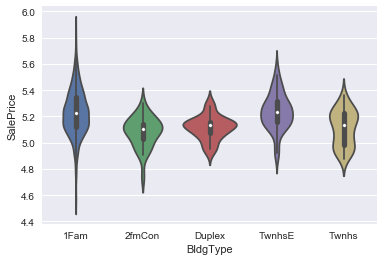

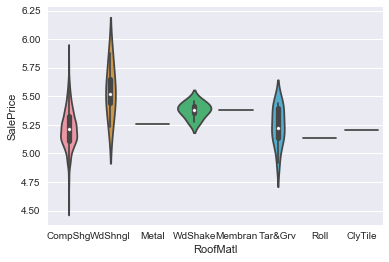

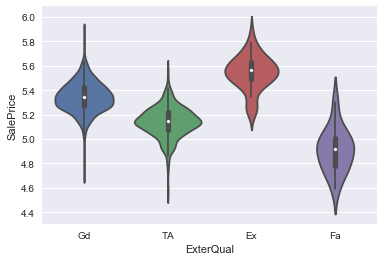

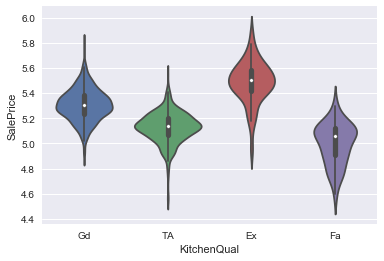

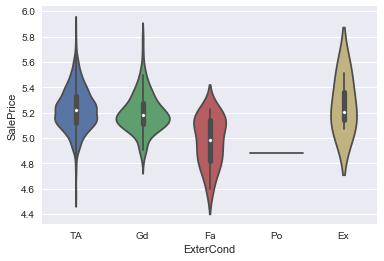

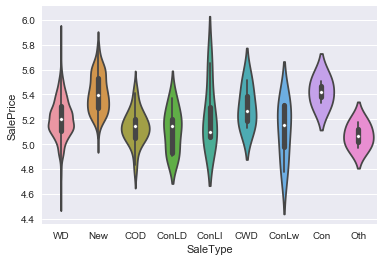

In [145]:
# violinplot: for all columns/decorations in the categorical column list 
for i in range(len(categorical_list)):
    sns.violinplot(x=categorical_list[i], y='SalePrice', data=df_train)
    plt.show()

### Hmm...
The categorical effect on 'SalePrice' for most of the columns/decorations is not clearly conclusive. Still the categories can be ideally scaled into different prioritical numerical values looking on above plots. But we are not going to be that much precise, don't want to make it so complicated. Rather we will only concentrate on few of the variables which have comparatively clear effect on 'SalePrice' based on their categories. As just metioned, there might different preference but just going through above plots, I am going to take following columns into consideration. To decide, I have tried to consider both the mean and kernel density of the columns on different categories, definitely as allowed by my eyes and instinct in a quick going through!

In [146]:
important_categorical_vars = ['KitchenQual', 'BsmtQual', 'Heating', 'ExterQual']

# Let us once again categories of these important variables
for col in important_categorical_vars:
    print(col, ": ", df_train[col].unique())

KitchenQual :  ['Gd' 'TA' 'Ex' 'Fa']
BsmtQual :  ['Gd' 'TA' 'Ex' 'Fa']
Heating :  ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
ExterQual :  ['Gd' 'TA' 'Ex' 'Fa']


### What Next.....?

We are now done with looking into the given train data and visualizing them to learn more about the data distribution. We studied about the different variables/columns in the data set primarily focusing on their effect on the target variable of the data - 'SalePrice'. There is definitely a lot that can be done with this data set, but just to be the target oriented we focused our data analysis around the variable 'SalePrice'. To do this, we used standard methodologies in data analysis and visualization implemeted in PYTHON (numpy, pandas, matplotlib and seaborn) making our life so simple and easy.


Though this completes a big part of this excercise, there is still the most important part of the task left, which is building up the prediction model using regression algorithms and guessing the 'SalePrice' of all the house in test data set. 

_It's already a lot of work, I guess I deserve some break before coming up with prediction model. Stay tuned!_